# 전국 공원 표준 데이터 
* 전국 도시공원 정보(공원유형,보유시설 등)를 제공합니다.
* 공공데이터 개방 표준데이터 속성정보(표현형식/단위 등)는 행정자치부에서 고시한 데이터를 참고합니다.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import re
from plotnine import *

In [3]:
pwd()

'C:\\Users\\채송이\\data\\open-data-park'

In [26]:
df = pd.read_csv('county_park_data.csv', encoding='euc-kr')
df.shape

(13135, 18)

In [40]:
df.head(21) # 소재지가 nan값이 꽤 많다.

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,데이터기준일자,시도,구군
0,42800-00001,상리공원,어린이공원,강원도 양구군 양구읍 상리 531,강원도 양구군 양구읍 상리 531,38.105771,127.985895,1597,2018-02-28,강원도,양구군
1,42800-00002,정림공원1,어린이공원,강원도 양구군 양구읍 상리 587,강원도 양구군 양구읍 상리 587,38.104065,127.984467,1498,2018-02-28,강원도,양구군
2,42800-00003,정림공원2,어린이공원,강원도 양구군 양구읍 상리 604-6,강원도 양구군 양구읍 상리 604-6,38.104065,127.984467,1499,2018-02-28,강원도,양구군
3,42800-00004,하리수변공원,수변공원,강원도 양구군 양구읍 하리 643,강원도 양구군 양구읍 하리 643,38.118243,127.981634,18437,2018-02-28,강원도,양구군
4,42800-00005,묘지공원,묘지공원,강원도 양구군 양구읍 죽곡리 산3-1,강원도 양구군 양구읍 죽곡리 산3-1,38.125344,127.999027,178931,2018-02-28,강원도,양구군
5,42800-00006,상리공원3,어린이공원,강원도 양구군 양구읍 상리 275-5,강원도 양구군 양구읍 상리 275-5,38.106175,127.990675,1768,2018-02-28,강원도,양구군
6,27170-00001,이현공원,근린공원,대구광역시 서구 이현동 산28-12,대구광역시 서구 이현동 산28-12,35.873385,128.543472,109324,2018-02-20,NaN,NaN
7,27170-00002,평리공원,근린공원,대구광역시 서구 평리동 1230-1,대구광역시 서구 평리동 1230-1,35.872311,128.557606,18512,2018-02-20,NaN,NaN
8,27170-00003,상리공원,근린공원,대구광역시 서구 중리동 산202,대구광역시 서구 중리동 산202,35.862094,128.530898,219886,2018-02-20,NaN,NaN
9,27170-00004,감삼공원,근린공원,대구광역시 서구 내당동 463-7,대구광역시 서구 내당동 463-7,35.858669,128.552224,16332,2018-02-20,NaN,NaN


In [38]:
df['소재지도로명주소'].fillna(df['소재지지번주소'], inplace = True)

In [39]:
df.isnull().sum()
# null값이 많은 항목을 뺴주자

관리번호           0
공원명            0
공원구분           0
소재지도로명주소       0
소재지지번주소     1204
위도             6
경도             6
공원면적          27
데이터기준일자        0
시도          5898
구군          5898
dtype: int64

In [41]:
df.head(30)

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,데이터기준일자,시도,구군
0,42800-00001,상리공원,어린이공원,강원도 양구군 양구읍 상리 531,강원도 양구군 양구읍 상리 531,38.105771,127.985895,1597,2018-02-28,강원도,양구군
1,42800-00002,정림공원1,어린이공원,강원도 양구군 양구읍 상리 587,강원도 양구군 양구읍 상리 587,38.104065,127.984467,1498,2018-02-28,강원도,양구군
2,42800-00003,정림공원2,어린이공원,강원도 양구군 양구읍 상리 604-6,강원도 양구군 양구읍 상리 604-6,38.104065,127.984467,1499,2018-02-28,강원도,양구군
3,42800-00004,하리수변공원,수변공원,강원도 양구군 양구읍 하리 643,강원도 양구군 양구읍 하리 643,38.118243,127.981634,18437,2018-02-28,강원도,양구군
4,42800-00005,묘지공원,묘지공원,강원도 양구군 양구읍 죽곡리 산3-1,강원도 양구군 양구읍 죽곡리 산3-1,38.125344,127.999027,178931,2018-02-28,강원도,양구군
5,42800-00006,상리공원3,어린이공원,강원도 양구군 양구읍 상리 275-5,강원도 양구군 양구읍 상리 275-5,38.106175,127.990675,1768,2018-02-28,강원도,양구군
6,27170-00001,이현공원,근린공원,대구광역시 서구 이현동 산28-12,대구광역시 서구 이현동 산28-12,35.873385,128.543472,109324,2018-02-20,NaN,NaN
7,27170-00002,평리공원,근린공원,대구광역시 서구 평리동 1230-1,대구광역시 서구 평리동 1230-1,35.872311,128.557606,18512,2018-02-20,NaN,NaN
8,27170-00003,상리공원,근린공원,대구광역시 서구 중리동 산202,대구광역시 서구 중리동 산202,35.862094,128.530898,219886,2018-02-20,NaN,NaN
9,27170-00004,감삼공원,근린공원,대구광역시 서구 내당동 463-7,대구광역시 서구 내당동 463-7,35.858669,128.552224,16332,2018-02-20,NaN,NaN


# <font color=blue> 데이터 전처리

## 결측값을 확인하니 공원보유시설(..)값을들 뺴주는게 좋겠어. df.drop으로 빼주자

In [29]:
df.drop(columns=['공원보유시설(운동시설)', '공원보유시설(유희시설)', '공원보유시설(편익시설)', '공원보유시설(교양시설)',
       '공원보유시설(기타시설)', '지정고시일', '관리기관명', 'Unnamed: 17','전화번호'], inplace=True)


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13135 entries, 0 to 13134
Data columns (total 9 columns):
관리번호        13135 non-null object
공원명         13135 non-null object
공원구분        13135 non-null object
소재지도로명주소    7237 non-null object
소재지지번주소     11931 non-null object
위도          13129 non-null float64
경도          13129 non-null float64
공원면적        13108 non-null object
데이터기준일자     13135 non-null object
dtypes: float64(2), object(7)
memory usage: 923.6+ KB


In [42]:
# 시도와 구군 데이터 가져오기
# <소재지도로명주소>에서 0번째는 시도를 나타낸다
# 1번째는 구군을 나타낸다.
df['시도'] = df['소재지도로명주소'].str.split(' ', expand=True)[0] 
df['구군'] = df['소재지도로명주소'].str.split(' ', expand=True)[1]

In [43]:
df.head(20)

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,데이터기준일자,시도,구군
0,42800-00001,상리공원,어린이공원,강원도 양구군 양구읍 상리 531,강원도 양구군 양구읍 상리 531,38.105771,127.985895,1597,2018-02-28,강원도,양구군
1,42800-00002,정림공원1,어린이공원,강원도 양구군 양구읍 상리 587,강원도 양구군 양구읍 상리 587,38.104065,127.984467,1498,2018-02-28,강원도,양구군
2,42800-00003,정림공원2,어린이공원,강원도 양구군 양구읍 상리 604-6,강원도 양구군 양구읍 상리 604-6,38.104065,127.984467,1499,2018-02-28,강원도,양구군
3,42800-00004,하리수변공원,수변공원,강원도 양구군 양구읍 하리 643,강원도 양구군 양구읍 하리 643,38.118243,127.981634,18437,2018-02-28,강원도,양구군
4,42800-00005,묘지공원,묘지공원,강원도 양구군 양구읍 죽곡리 산3-1,강원도 양구군 양구읍 죽곡리 산3-1,38.125344,127.999027,178931,2018-02-28,강원도,양구군
5,42800-00006,상리공원3,어린이공원,강원도 양구군 양구읍 상리 275-5,강원도 양구군 양구읍 상리 275-5,38.106175,127.990675,1768,2018-02-28,강원도,양구군
6,27170-00001,이현공원,근린공원,대구광역시 서구 이현동 산28-12,대구광역시 서구 이현동 산28-12,35.873385,128.543472,109324,2018-02-20,대구광역시,서구
7,27170-00002,평리공원,근린공원,대구광역시 서구 평리동 1230-1,대구광역시 서구 평리동 1230-1,35.872311,128.557606,18512,2018-02-20,대구광역시,서구
8,27170-00003,상리공원,근린공원,대구광역시 서구 중리동 산202,대구광역시 서구 중리동 산202,35.862094,128.530898,219886,2018-02-20,대구광역시,서구
9,27170-00004,감삼공원,근린공원,대구광역시 서구 내당동 463-7,대구광역시 서구 내당동 463-7,35.858669,128.552224,16332,2018-02-20,대구광역시,서구


In [44]:
df[['공원명','공원구분','위도','경도','공원면적','시도','구군']] #보고싶은 칼럼만 가져오기

,공원명,공원구분,위도,경도,공원면적,시도,구군
0,상리공원,어린이공원,38.105771,127.985895,1597,강원도,양구군
1,정림공원1,어린이공원,38.104065,127.984467,1498,강원도,양구군
2,정림공원2,어린이공원,38.104065,127.984467,1499,강원도,양구군
3,하리수변공원,수변공원,38.118243,127.981634,18437,강원도,양구군
4,묘지공원,묘지공원,38.125344,127.999027,178931,강원도,양구군
5,상리공원3,어린이공원,38.106175,127.990675,1768,강원도,양구군
6,이현공원,근린공원,35.873385,128.543472,109324,대구광역시,서구
7,평리공원,근린공원,35.872311,128.557606,18512,대구광역시,서구
8,상리공원,근린공원,35.862094,128.530898,219886,대구광역시,서구
9,감삼공원,근린공원,35.858669,128.552224,16332,대구광역시,서구


In [45]:
#다시 결측값을 봐보자
df.isnull().sum()

관리번호           0
공원명            0
공원구분           0
소재지도로명주소       0
소재지지번주소     1204
위도             6
경도             6
공원면적          27
데이터기준일자        0
시도             0
구군             0
dtype: int64

소재지도로명주소랑 소재지지번주소, 시도,구군은 어떻길래 결측값이 많은거야?

In [15]:
# plotnine에 면적 표현용 데이터 만들기
df['공원면적'] = df['공원면적'].str.replace(',', '').astype(float)
df['공원면적그래프용'] = df['공원면적'].apply(lambda x : x * 0.0001)
df['공원면적그래프용'].head()


0     0.1597
1     0.1498
2     0.1499
3     1.8437
4    17.8931
Name: 공원면적그래프용, dtype: float64

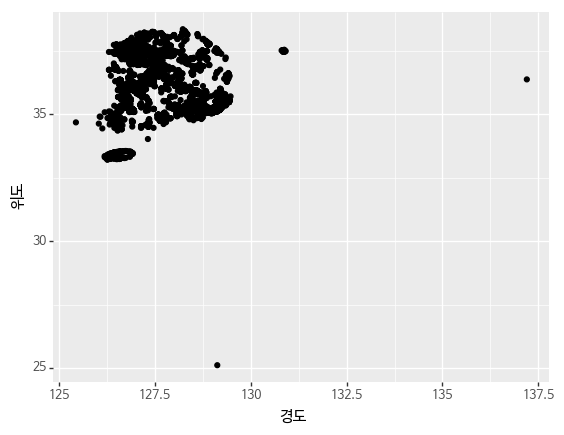

<ggplot: (-9223371876363425767)>

In [46]:
# 지도를 출력해 보니 특정 지역만 있습니다.
# 결측치인 nan 데이터 때문에 다른 데이터가 제대로 보이지 않습니다.
# nan 데이터를 제거하고 다시 그려봅니다.
(ggplot(df)
 + aes(x='경도', y='위도')
 + geom_point()
 + theme(text=element_text(family='NanumBarunGothic'))
)


In [47]:
# 위 지도로 위도와 경도의 아웃라이어 데이터를 제외하고 출력해 봅니다.
# 좀 더 정확하게 출력하려면 대한민국 위경도 데이터 범위를 다시 넣어줍니다. 
# 그래프 표현시 위경도가 NaN값이면 오류가 나니 제거해 줍니다. 
df = df.loc[(df['위도'] > 32 ) 
            & (df['경도'] < 132) 
            & df['시도'].notnull()]
df.shape


(13127, 11)

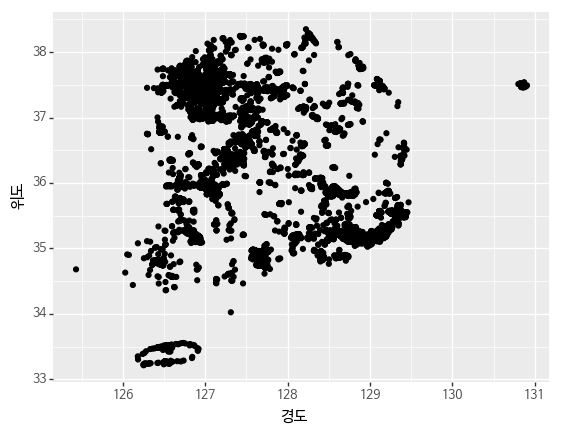

<ggplot: (-9223371876363425620)>

In [48]:
(ggplot(df)
 + aes(x='경도', y='위도')
 + geom_point()
 + theme(text=element_text(family='NanumBarunGothic'))
)


In [49]:
# 특정지역의 일부 공원만 보기
park_type = r'.*((역사|체육|수변|문화|묘지)공원).*'
gg_sample = df.loc[df['공원구분'].str.match(park_type)]

In [50]:
# 시도별로 합계 데이터를 출력
park_do = pd.DataFrame(df['시도'].value_counts())
park_do_normalize = pd.DataFrame(df['시도'].value_counts(normalize=True))
park_sido = park_do.merge(park_do_normalize, left_index=True, right_index=True).reset_index()

In [51]:
park_sido.columns = ['시도', '합계', '비율']
park_sido.sort_values(by=['합계'], ascending=False)
park_sido

,시도,합계,비율
0,경기도,3675,0.279957
1,서울특별시,1226,0.093395
2,전라북도,1076,0.081968
3,충청북도,904,0.068866
4,경상남도,881,0.067114
5,울산광역시,822,0.062619
6,전라남도,623,0.047459
7,강원도,623,0.047459
8,부산광역시,610,0.046469
9,경상북도,465,0.035423


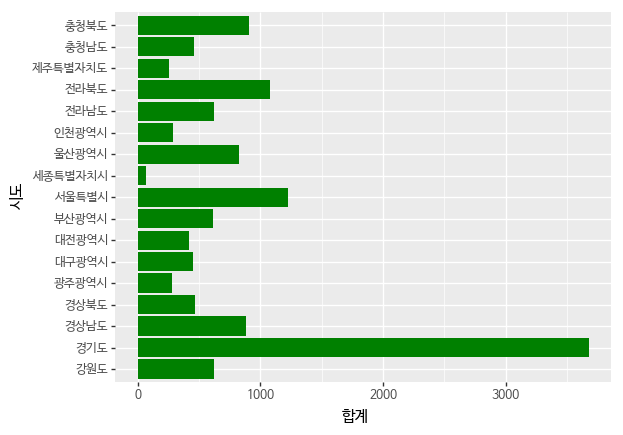

<ggplot: (160494115069)>

In [52]:
# 경기도가 압도적으로 많음
(ggplot(park_sido.sort_values(by=['합계'], ascending=False))
 + aes(x='시도', y='합계')
 + geom_bar(stat='identity', position='dodge', fill='green')
 + coord_flip()
 + theme(text=element_text(family='NanumBarunGothic'))
)


In [53]:
df[['공원명','공원구분','위도','경도','공원면적','시도','구군']].head() #보고싶은 칼럼만 가져오기

,공원명,공원구분,위도,경도,공원면적,시도,구군
0,상리공원,어린이공원,38.105771,127.985895,1597,강원도,양구군
1,정림공원1,어린이공원,38.104065,127.984467,1498,강원도,양구군
2,정림공원2,어린이공원,38.104065,127.984467,1499,강원도,양구군
3,하리수변공원,수변공원,38.118243,127.981634,18437,강원도,양구군
4,묘지공원,묘지공원,38.125344,127.999027,178931,강원도,양구군


In [55]:
df_kungki=df[df['시도']=='경기도']

In [56]:
df_kungki.shape

(3675, 11)

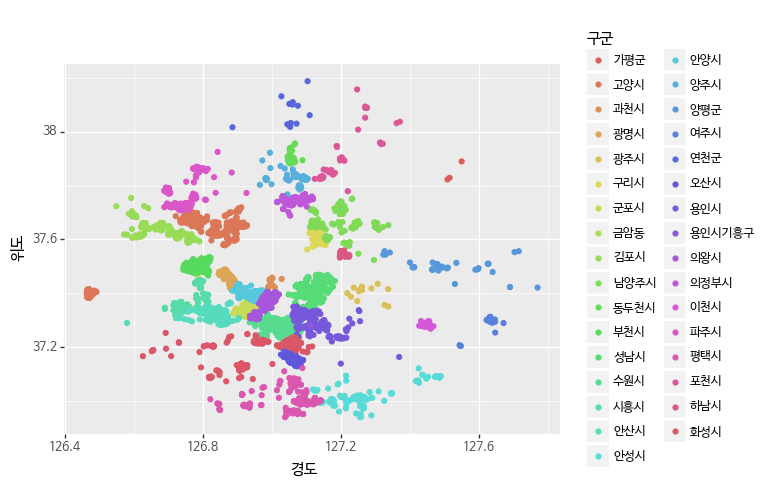

<ggplot: (-9223371876361068316)>

In [58]:
(ggplot(df_kungki)
 + aes(x='경도', y='위도', color='구군')
 + geom_point()
 + theme(text=element_text(family='NanumBarunGothic'))
 + scale_fill_gradient(low = 'blue', high = 'green') 
)

In [62]:
df_kungki['공원구분'].value_counts()

어린이공원    2037
근린공원      894
소공원       475
문화공원       76
체육공원       73
수변공원       64
역사공원       34
묘지공원       12
기타         10
Name: 공원구분, dtype: int64

In [72]:
df_kungki.head(2)

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,데이터기준일자,시도,구군
403,41220-00001,동부,근린공원,경기도 평택시 동부공원로 46 (비전동),경기도 평택시 동부공원로 46 (비전동),36.994726,127.118767,29821,2018-02-19,경기도,평택시
404,41220-00002,동부그린,근린공원,경기도 평택시 비전동 875,경기도 평택시 비전동 875,36.996666,127.117641,10578.3,2018-02-19,경기도,평택시


In [79]:
import folium
geo_df = anyang
map = folium.Map(location=[geo_df['위도'].mean(), geo_df['경도'].mean()], zoom_start=12,tiles='Stamen Watercolor')

for n in geo_df.index:
    computer_name = geo_df['공원명'][n] + ' - ' + geo_df['소재지도로명주소'][n]
    folium.Marker([geo_df['위도'][n], geo_df['경도'][n]], popup=computer_name).add_to(map)
    
map

In [77]:
anyang=df_kungki[df_kungki['구군'] == '안양시']